# 3 Use-Cases for Gaussian Mixture Models (GMM)

Overview

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture
plt.style.use('ggplot')

## 1. Feature Engineering



In [24]:
# https://www.kaggle.com/datasets/narsingraogoud/zomato-restaurants-dataset-for-metropolitan-areas

In [217]:
!kaggle datasets download -d sbonelondhlazi/bookstore-dataset
!unzip bookstore-dataset

  0%|                                               | 0.00/25.8k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 25.8k/25.8k [00:00<00:00, 2.18MB/s]
Archive:  bookstore-dataset.zip
  inflating: books_scraped.csv       


In [72]:
df = pd.read_csv('books_scraped.csv')

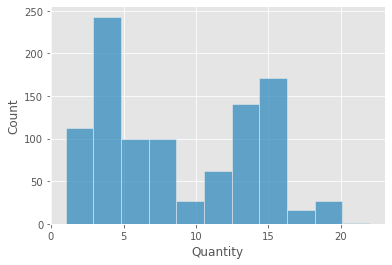

In [81]:
sns.histplot(data=df, x='Quantity')
plt.show()

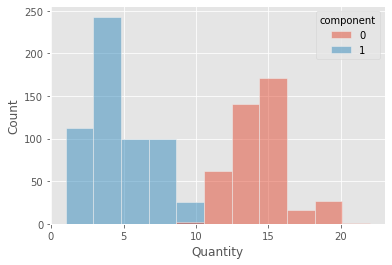

In [80]:
gmm = GaussianMixture(n_components=2)
gmm.fit(df[['Quantity']])

df['component'] = gmm.predict(df[['Quantity']])

sns.histplot(data=df, x='Quantity', hue='component')
plt.show()

## 2. Unsupervised Classification

In [82]:
!kaggle datasets download -d parulpandey/palmer-archipelago-antarctica-penguin-data
!unzip palmer-archipelago-antarctica-penguin-data

  0%|                                               | 0.00/11.3k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 11.3k/11.3k [00:00<00:00, 8.04MB/s]
Archive:  palmer-archipelago-antarctica-penguin-data.zip
  inflating: penguins_lter.csv       
  inflating: penguins_size.csv       


In [135]:
df = pd.read_csv('penguins_size.csv')

In [136]:
# some preprocessing and engineering
df = df[~df.isnull().any(axis=1)]

features = ['culmen_length_mm', 'culmen_depth_mm']


In [209]:
gmm = GaussianMixture(n_components=3)
gmm.fit(df[features])

df['component'] = gmm.predict(df[features])

In [210]:
df.groupby(['species', 'component'])['component'].count()

species    component
Adelie     1            142
           2              4
Chinstrap  1              5
           2             63
Gentoo     0            106
           2             14
Name: component, dtype: int64

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

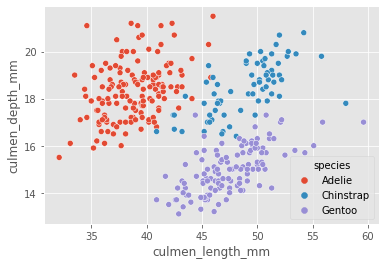

In [212]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='species')

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

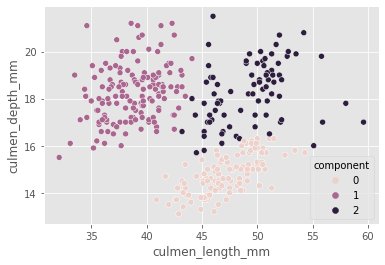

In [213]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='component')

## 3. Anomaly Detection